In [2]:
from sklearn import datasets
data = datasets.load_iris()
for k in data:
    print("##########\n##%s##\n##########\n"% k)
    print(data[k])

##########
##data##
##########

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]

In [3]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
df = pd.DataFrame(data.data)
df.columns = data.feature_names
df['species'] = [data['target_names'][x] for x in data.target]
df.head()
df.describe()
for i in range(4):
    name = data.feature_names[i]
    ax = plt.subplot(2,2,i+1)
    stats.probplot(df[name],plot=ax)
    ax.set_title(name)

In [4]:
import numpy as np
np_temp = [36.2,36.3,36.4,np.nan,36.3,36.2,36.4]
np.nanmean(np_temp)


36.3

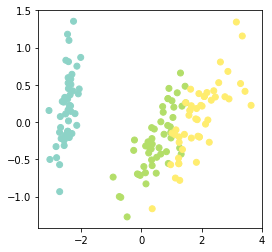

In [6]:
from sklearn.decomposition import PCA
pca = PCA();
df_sub = df[data.feature_names[0:3]]
pca.fit(df_sub)

pca_result = pca.transform(df_sub)
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.scatter(pca_result[:,0],pca_result[:,1],c=data.target,cmap=plt.cm.Set3)

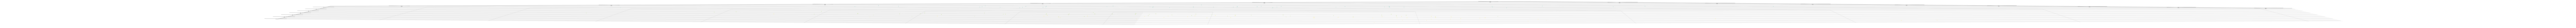

In [11]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
plane_show_size_ratio = 5;
plane_show_shift = df_sub.mean().values
pca_score = pca.explained_variance_ratio_
V = pca.components_
l_pca_axis =V.T * plane_show_size_ratio
l_pca_plane = []
for pca_axis in l_pca_axis:
    l_pca_plane.append(np.r_[pca_axis[:2],-pca_axis[1::-1]].reshape(2,2))

fig = plt.figure(figsize=(4,4))
ax = Axes3D(fig,rect=[0,0,95,1],elev=150,azim=-34)
ax.scatter(df_sub.values[:,0],df_sub.values[:,1],df_sub.values[:,2],'.',c=data.target,cmap=plt.cm.Set3)

In [20]:
#训练集划分
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#df中的80%作为训练集，20%作为验证集
df_train,df_val = train_test_split(df,train_size = 0.8,random_state=0)
#提取特征，这里是将分类结果舍去
X_train = df_train.drop(['species'],axis=1)
X_val = df_val.drop(['species'],axis=1)
#提取分类结果
Y_train = df_train['species']
Y_val = df_val['species']

#设定X_scaler，用训练集估计（fit）分布，然后对验证集进行转换（transform）
X_scaler = StandardScaler()
X_trainT = X_scaler.fit_transform(X_train)
X_valT = X_scaler.transform(X_val)
print(X_trainT.mean(axis=0),X_trainT.var(axis=0))
print(X_valT.mean(axis=0),X_valT.var(axis=0))

[ 0.00000000e+00 -7.49863135e-16  4.25585493e-16  2.57201667e-16] [1. 1. 1. 1.]
[-0.22139933  0.04650045 -0.16268614 -0.20938118] [0.70916187 1.09892486 0.87780845 0.80531547]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
